In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [33]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
df.shape

(301, 9)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [37]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [38]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [39]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [40]:
x=df.drop(['Car_Name','Selling_Price'], axis=1)
y=df['Selling_Price']

In [41]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [42]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING TRAINING AND TESTING DATA

In [43]:
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


MODEL TRAINING

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

MODEL EVALUATION

In [46]:
data_prediction=model.predict(x_train)

In [47]:
error_score=metrics.r2_score(y_train,data_prediction)
print("R squared error :",error_score)


R squared error : 0.8796483009370215


VISULALISING ACTUAL AND PREDICTED PRICES

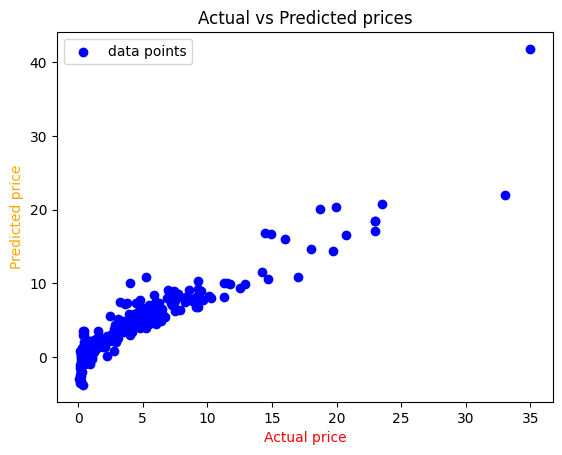

In [48]:
plt.scatter(y_train,data_prediction,label="data points",color="blue")
plt.xlabel("Actual price",color="red")
plt.ylabel("Predicted price",color="orange")
plt.title("Actual vs Predicted prices")
plt.legend()
plt.show()

In [49]:
test_data_prediction=model.predict(x_test)

In [50]:
test_error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error :",test_error_score)


R squared error : 0.8365861023210703


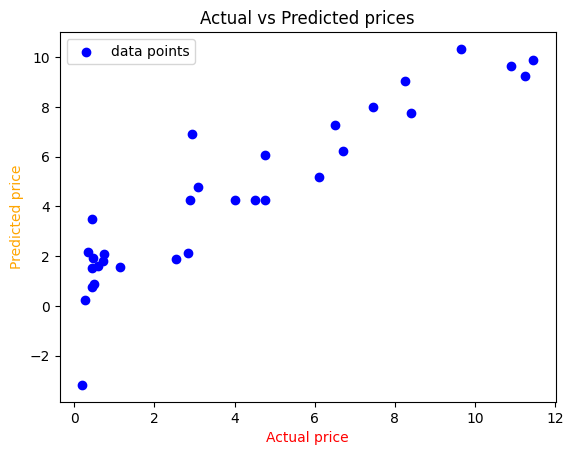

In [51]:
plt.scatter(y_test,test_data_prediction,label="data points",color="blue")
plt.xlabel("Actual price",color="red")
plt.ylabel("Predicted price",color="orange")
plt.title("Actual vs Predicted prices")
plt.legend()
plt.show()

 Lasso Regression

R squared error : 0.8424480718240743


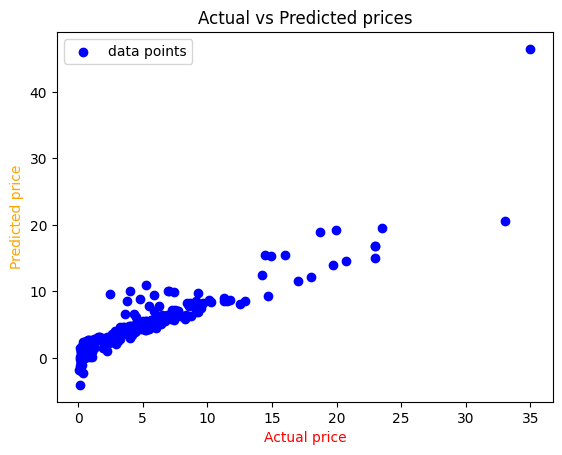

R squared error : 0.8709763132343395


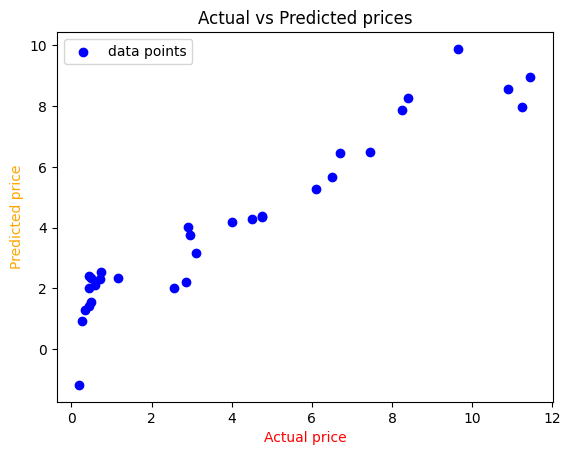

In [53]:
lass_model=Lasso()
lass_model.fit(x_train,y_train)
data_prediction=lass_model.predict(x_train)
error_score=metrics.r2_score(y_train,data_prediction)
print("R squared error :",error_score)
plt.scatter(y_train,data_prediction,label="data points",color="blue")
plt.xlabel("Actual price",color="red")
plt.ylabel("Predicted price",color="orange")
plt.title("Actual vs Predicted prices")
plt.legend()
plt.show()
test_data_prediction=lass_model.predict(x_test)
test_error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error :",test_error_score)
plt.scatter(y_test,test_data_prediction,label="data points",color="blue")
plt.xlabel("Actual price",color="red")
plt.ylabel("Predicted price",color="orange")
plt.title("Actual vs Predicted prices")
plt.legend()
plt.show()